In [148]:
import h5py
import numpy as np 
import math

levels = [1, 2, 3, 5, 7, 10, 20, 30, 50, 70,\
          100, 150, 200, 250, 300, 350, 400, 450,\
          500, 550, 600, 650, 700, 750, 800, 850,\
          900, 925, 950, 975, 1000]

def open_h5(filename):
    hf = h5py.File(filename, 'r')
    return hf['test']


def get_wind(data, lat_res, lon_res, level_res):
    lat_i, lat_f = lat_res
    lon_i, lon_f = lon_res
    level_i, level_f = level_res

    u = data[0][level_i][lat_i][lon_i] * lat_f * lon_f * level_f + \
        data[0][level_i][lat_i + 1][lon_i] * (1-lat_f) * lon_f * level_f + \
        data[0][level_i][lat_i][lon_i + 1] * lat_f * (1-lon_f) * level_f + \
        data[0][level_i][lat_i + 1][lon_i + 1] * (1-lat_f) * (1-lon_f) * level_f + \
        data[0][level_i + 1][lat_i][lon_i]* lat_f * lon_f * (1-level_f) + \
        data[0][level_i + 1][lat_i + 1][lon_i] * (1-lat_f) * lon_f * (1-level_f) + \
        data[0][level_i + 1][lat_i][lon_i + 1]* lat_f * (1-lon_f) * (1-level_f) + \
        data[0][level_i + 1][lat_i + 1][lon_i + 1] * (1-lat_f) * (1-lon_f) * (1-level_f)
        
    v = data[1][level_i][lat_i][lon_i] * lat_f * lon_f * level_f + \
        data[1][level_i][lat_i + 1][lon_i] * (1-lat_f) * lon_f * level_f + \
        data[1][level_i][lat_i][lon_i + 1] * lat_f * (1-lon_f) * level_f + \
        data[1][level_i][lat_i + 1][lon_i + 1] * (1-lat_f) * (1-lon_f) * level_f + \
        data[1][level_i + 1][lat_i][lon_i]* lat_f * lon_f * (1-level_f) + \
        data[1][level_i + 1][lat_i + 1][lon_i] * (1-lat_f) * lon_f * (1-level_f) + \
        data[1][level_i + 1][lat_i][lon_i + 1]* lat_f * (1-lon_f) * (1-level_f) + \
        data[1][level_i + 1][lat_i + 1][lon_i + 1] * (1-lat_f) * (1-lon_f) * (1-level_f)

    return u, v

## Array format: array[u,v][Pressure][Lat][Lon] ##
## Currently [lat 90 to -90][lon 0 to 395.5]

## Note: this returns bounds as array indices ##
def get_bounds_and_fractions (lat, lon, alt):
    
    lat_res, lon_res, pressure_res = None, None, None
    
    pressure = alt_to_hpa(alt)

    for i in range(len(levels)):
        if pressure<=levels[i]:
            fraction = (levels[i]-pressure)/(levels[i]-levels[i-1])
            pressure_res = (i - 1, fraction)
            break;
        pressure_res = i-1, 0
    
    lat = lat * 2;
    lat = 90 - lat;
    lat_res = (math.floor(lat) , 1 - lat % 1)

    
    lat = (lon % 360) * 2;
    lon_res = (math.floor(lat), 1 - lon % 1)

    return lat_res, lon_res, pressure_res


## Credits to KMarshland ##
def alt_to_hpa(altitude):
    pa_to_hpa = 1.0/100.0
    if altitude < 11000:
        return pa_to_hpa * math.exp(math.log(1.0 - (altitude/44330.7)) / 0.190266) * 101325.0
    else:
        return pa_to_hpa * math.exp(altitude / -6341.73) * 22632.1 / 0.176481




In [161]:
print(get_wind(data, *get_bounds_and_fractions(2, -125, 300)))


(6.576790359471774, -2.781118516543241)


In [70]:
data = open_h5("../../gfsanl/2018020300.h5")
print(data.shape)

(2, 31, 361, 720)


In [29]:
### Altitude to pressure from RSud ###
def a2pr(alt):
    return 1013.25*(1.0 - alt/44330.0) ** (5.255)

In [46]:
print(a2pr(50000))
print(a2pk(50000))

(-0.014287420649214724-0.01474347439168669j)


NameError: name 'a2pk' is not defined

In [92]:
import matplotlib
import numpy as np
import pygrib
import urllib.request
import os.path
import math
import sys

In [95]:
def download_anl(y, m, d, h, save_dir):
    save_path = get_file_name(save_dir, y, m, d, h)

    url = "https://nomads.ncdc.noaa.gov/data/gfsanl/" + str(y) + str(m).zfill(2) + "/" + str(y) + str(m).zfill(2) + str(d).zfill(2) + \
              "/gfsanl_4_" + str(y) + str(m).zfill(2) + str(d).zfill(2) + "_" + str(h).zfill(2) + "00_000.grb2"

    if not os.path.exists(save_path + ".grb2"):
        urllib.request.urlretrieve (url, save_path + ".grb2")
    return save_path

def get_file_name(save_dir, y, m, d, h):
    return save_dir + "/" + str(y) + str(m).zfill(2) + str(d).zfill(2) + str(h).zfill(2)


In [96]:
y, m, d, h = 2018, 9, 1, 6 
save_dir = "../../gfsanl/"

path = download_anl(y, m, d, h, save_dir)

In [98]:
print(path)
grbs = pygrib.open(path + ".grb2")

../../gfsanl//2018090106


In [69]:
levels = [1, 2, 3, 5, 7, 10, 20, 30, 50, 70,\
          100, 150, 200, 250, 300, 350, 400, 450,\
          500, 550, 600, 650, 700, 750, 800, 850,\
          900, 925, 950, 975, 1000]


## Array format: array[u,v][Pressure][Lat][Lon] ##
## Currently [lat 90 to -90][lon 0 to 395.5]

dataset = np.zeros((2, len(levels), 180*2 + 1, 360*2))


### Thanks to KMarshland for pointers on using PyGrib ###
for i in range(len(levels)):
    for grb in grbs.select(shortName='u',typeOfLevel='isobaricInhPa', level = levels[i]):
        dataset[0][i] = grb.data()[0]
        
for i in range(len(levels)):
    for grb in grbs.select(shortName='v',typeOfLevel='isobaricInhPa', level = levels[i]):
        dataset[1][i] = grb.data()[0]
        
        

In [102]:
print(dataset[0][25][50][54])

with h5py.File(path + ".h5", 'w') as hf:
    hf.create_dataset("test", data = dataset, dtype = 'f', compression = 'lzf')

-2.8271119594573975


In [49]:
import csv
import random
import math

# https://ssi-teams.slack.com/archives/CB173KKEU/p1542677011199100
ASCENT_RATE = 3.7
ASCENT_RATE_STDEV = 0.2
TARGET_ALT = 26.0 * 1000

SA_LAT = 32.9904
SA_LON = -106.9750
EARTH_RAD = 6371000

DATIL_LAT = 34.144444
DATIL_LON = -107.844167
QUEEN_LAT = 32.190833
QUEEN_LON = -104.745833

data = {}

with open('wind.csv') as wind_csv:
    reader = csv.reader(wind_csv)
    for year, month, day, hour, u, v, t, h, p in reader:
        if year == 'Year':
            continue
        key = year+'-'+month+'-'+day+'-'+hour
        if key not in data:
            data[key] = {}
        data[key][float(h)] = (float(u), float(v))

FileNotFoundError: [Errno 2] No such file or directory: 'wind.csv'

In [41]:
def a_new_moment():
    return random.choice(data.keys())

import bisect
def get_wind_at_alt(moment, h):
    atm = data[moment]
    alts = sorted(atm.keys())
    idx = bisect.bisect_left(alts, h)
    h_l = alts[max(idx - 1, 0)]
    h_r = alts[min(idx, len(alts) - 1)]
    u_l, v_l = atm[h_l]
    u_r, v_r = atm[h_r]
    if h_l == h_r:
        return u_l, v_l
    else:
        rat = (h - h_l) / (h_r - h_l)
        return ((u_l + rat * (u_r - u_l)), (v_l + rat * (v_r - v_l)))

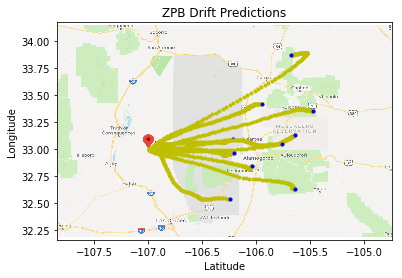

In [44]:
from matplotlib import pyplot as plt
from numpy.random import normal

map_img = plt.imread('map.png')
fig, ax = plt.subplots()
ax.imshow(map_img, aspect='equal', extent=[DATIL_LON, QUEEN_LON, QUEEN_LAT, DATIL_LAT])

plt.title('ZPB Drift Predictions')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.axis('equal')
plt.plot(SA_LON, SA_LAT, '*r')

m = a_new_moment()

def do_a_thing():
    w = normal(ASCENT_RATE, ASCENT_RATE_STDEV)
    h = 0
    x = 0
    y = 0
    lat = SA_LAT
    lon = SA_LON
    t = 0
    traj_x = []
    traj_y = []

    dt = 60 # second
    while h < TARGET_ALT:
        h += w * dt
        u, v = get_wind_at_alt(m, h)
        dx = u * dt
        dy = v * dt
        x += dx
        y += dy
        t += dt
        lat += (dy / (2 * math.pi * EARTH_RAD)) * 360
        lon += (dx / (2 * math.pi * EARTH_RAD * math.cos(lat * math.pi / 180))) * 360
        if t % 60 * 60 == 0:
            plt.plot(lon, lat, '.y')
            pass

    plt.plot(lon, lat, '.b')

for j in xrange(10):
    m = a_new_moment()
    for i in xrange(1):
        do_a_thing()

        
plt.savefig('map.pdf', dpi=300)